In [1]:
import pandas as pd
import numpy as np
import time
import collections
import math
import re

In [6]:
a1 = pd.read_excel('../librarydata/201001.xlsx', header=None)
a2 = pd.read_excel("../librarydata/201003.xlsx", header=None)
a3 = pd.read_excel("../librarydata/201004.xlsx", header=None)
a4 = pd.read_excel("../librarydata/201005.xlsx", header=None)
a5 = pd.read_excel("../librarydata/201006.xlsx", header=None)
a7 = pd.read_excel("../librarydata/201007.xlsx", header=None)

In [7]:
a = pd.concat([a1, a2, a3, a4, a5,a7])
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178464 entries, 0 to 21234
Data columns (total 5 columns):
0    178464 non-null object
1    178464 non-null object
2    178409 non-null object
3    178464 non-null object
4    178464 non-null object
dtypes: object(5)
memory usage: 8.2+ MB


In [10]:
a.columns = ["name", "bookname", "category", "day", "minute"]

In [11]:
a.head(10)

,name,bookname,category,day,minute
0,240093421,光辉业绩 伟人风采:细说《邓小平》,7-5051-0077-7,2010-01-04,13:50:27
1,206080127,电路原理.上册,7-302-01968-1,2010-01-11,13:06:09
2,S20060989,交流调速系统,7-111-05236-6,2010-01-05,09:04:09
3,S20062833,过程控制,7-302-01115-X,2010-01-11,13:46:13
4,S20062833,过程控制,7-302-01115-X,2010-01-11,13:46:09
5,S20065040,"资本论.一卷,资本的生产过程",7-01-000172-3,2010-01-12,09:17:39
6,233090210,英语语法大全,7-5600-1003-2,2010-01-06,13:36:26
7,240073023,英语构词解析:前缀、后缀与词根,9071.76,2010-01-04,14:43:40
8,214090315,新编大学英语四级考试高分突破.词汇·语法,7-5023-3159-X,2010-01-07,14:36:29
9,231070515,机械制造工艺学及夹具设计,15271.053,2010-01-04,12:52:37


In [ ]:
a.to_csv("../librarydata/totaldata.csv", encoding='utf-8')

In [12]:
data = pd.read_csv("../librarydata/totaldata.csv", encoding='utf-8', index_col=0)

In [26]:
print("借书记录：", len(data.index))
print("总计书本：",len(data["bookname"].unique()))
print("总计学生：", len(data["name"].unique()))

借书记录： 178464
总计书本： 53292
总计学生： 16199


In [27]:
data["rank"] = 0
data["time"] = data["day"] + " " + data["minute"]
data["timestamp"] = [time.strptime(i, "%Y-%m-%d %H:%M:%S") for i in data["time"]]
data["timestamp"] = [time.mktime(i) for i in data["timestamp"]]
data.head(10)

,name,bookname,category,day,minute,time,timestamp,rank
0,240093421,光辉业绩 伟人风采:细说《邓小平》,7-5051-0077-7,2010-01-04,13:50:27,2010-01-04 13:50:27,1.262584e+09,0
1,206080127,电路原理.上册,7-302-01968-1,2010-01-11,13:06:09,2010-01-11 13:06:09,1.263186e+09,0
2,S20060989,交流调速系统,7-111-05236-6,2010-01-05,09:04:09,2010-01-05 09:04:09,1.262653e+09,0
3,S20062833,过程控制,7-302-01115-X,2010-01-11,13:46:13,2010-01-11 13:46:13,1.263189e+09,0
4,S20062833,过程控制,7-302-01115-X,2010-01-11,13:46:09,2010-01-11 13:46:09,1.263189e+09,0
5,S20065040,"资本论.一卷,资本的生产过程",7-01-000172-3,2010-01-12,09:17:39,2010-01-12 09:17:39,1.263259e+09,0
6,233090210,英语语法大全,7-5600-1003-2,2010-01-06,13:36:26,2010-01-06 13:36:26,1.262756e+09,0
7,240073023,英语构词解析:前缀、后缀与词根,9071.76,2010-01-04,14:43:40,2010-01-04 14:43:40,1.262587e+09,0
8,214090315,新编大学英语四级考试高分突破.词汇·语法,7-5023-3159-X,2010-01-07,14:36:29,2010-01-07 14:36:29,1.262846e+09,0
9,231070515,机械制造工艺学及夹具设计,15271.053,2010-01-04,12:52:37,2010-01-04 12:52:37,1.262581e+09,0


In [ ]:
#统计每本书借阅次数
bookname_set = set(data["bookname"])
bookname_map = {x:0 for x in bookname_set}
for i in data["bookname"]:
    bookname_map[i] += 1
book_count = pd.DataFrame(bookname_map)
book_count.to_csv("librarydata/book_count.csv", encoding="utf-8")

In [ ]:
name_count = set(data["name"])
name_count = {x:[] for x in name_count}
for na, book_na in zip(data["name"], data["bookname"]):
    name_count[na].append(book_na)
name = pd.Series(name_count)
name = pd.DataFrame(name, columns=["bookname"])
name["bookname"] = name["bookname"].apply(lambda x:np.array(x))
name.to_csv("librarydata/user_item_rename.csv", encoding='utf-8')

In [ ]:
book_split = re.split("[|]|,",user_item.loc['214090315']["bookname"].replace('\'','').replace("[","").replace("]",""))
for index,name,bookname,rank in zip(data.index,data["name"],data["bookname"],data["rank"]):
    book_split = re.split("[|]|,",user_item.loc[name]["bookname"].replace('\'','').replace("[","").replace("]",""))
    for i in range(len(book_split)):
        book_split[i] = book_split[i].strip()
    count = collections.Counter(book_split)
    if count[bookname] >= 2:
        data.loc[index, "rank"] = 5
#         print('1')
    elif book_count.loc[book_count["bookname"] == bookname]["count"].values >= 20:
        data.loc[index, "rank"] = 5
#         print(2)
    else:
        data.loc[index, "rank"] = int(np.round(0.2*book_count.loc[book_count["bookname"] == bookname]["count"].values+1))
#         print(3)

In [31]:
final = pd.read_csv("../librarydata/rename.csv", encoding='utf-8', index_col=0)
final.head(10)

,name,bookname,category,day,minute,rank,time,timestamp
0,12495,13720,7-5051-0077-7,2010-01-04,13:50:27,1,2010-01-04 13:50:27,1.262584e+09
1,3840,40054,7-302-01968-1,2010-01-11,13:06:09,2,2010-01-11 13:06:09,1.263186e+09
2,13312,11495,7-111-05236-6,2010-01-05,09:04:09,2,2010-01-05 09:04:09,1.262653e+09
3,14257,49372,7-302-01115-X,2010-01-11,13:46:13,5,2010-01-11 13:46:13,1.263189e+09
4,14257,49372,7-302-01115-X,2010-01-11,13:46:09,5,2010-01-11 13:46:09,1.263189e+09
5,15176,48565,7-01-000172-3,2010-01-12,09:17:39,2,2010-01-12 09:17:39,1.263259e+09
6,9113,45957,7-5600-1003-2,2010-01-06,13:36:26,2,2010-01-06 13:36:26,1.262756e+09
7,9989,45851,9071.76,2010-01-04,14:43:40,5,2010-01-04 14:43:40,1.262587e+09
8,7855,30785,7-5023-3159-X,2010-01-07,14:36:29,2,2010-01-07 14:36:29,1.262846e+09
9,8726,32822,15271.053,2010-01-04,12:52:37,2,2010-01-04 12:52:37,1.262581e+09


In [3]:
import matplotlib.pyplot as plt

In [32]:
a = final["rank"].value_counts()

In [29]:
a.sort_index()

1    30055
2    41436
3    21297
4    12514
5    36748
Name: rank, dtype: int64

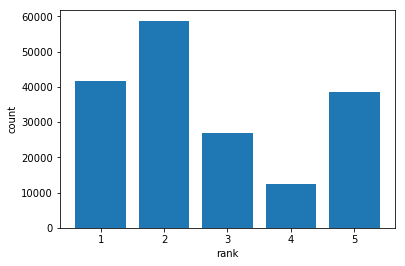

In [33]:
plt.bar(range(1,6),a.sort_index())
plt.xlabel("rank")
plt.ylabel("count")
plt.show()

In [ ]:
data.to_csv("librarydata/stand.csv")

In [ ]:
for index,bookname in zip(data_new.index,data_new["bookname"]):
    data_new.loc[index, "bookname"] = book_count.loc[book_count["bookname"] == bookname].index[0]
data_new.to_csv("librarydata/final.csv", encoding='utf-8')

In [ ]:
final_data["rank"] = final_data["rank"] - 1
kmeans = KMeans(n_clusters=8, random_state=0).fit(final_data[["name","bookname"]], final_data["rank"])
print(kmeans)
Y = kmeans.predict(final_data[["name","bookname"]])
metrics.adjusted_rand_score(final_data["rank"], Y)

In [2]:
import tensorflow as tf
from keras import layers
from keras.layers import RepeatVector, Dense, Activation, Lambda, Input
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import load_model, Model
import keras.backend as K

C:\Users\LT\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [29]:
final_data = pd.read_csv("../librarydata/rename.csv", encoding='utf-8',index_col=0)
final_data = final_data.reindex(np.random.permutation(final_data.index))
training = final_data.head(176678)
validation = final_data.tail(1786)

In [3]:
final_data = pd.read_csv("../librarydata/follow_surprise.csv", encoding="utf-8", index_col=0)
final_data = final_data.reindex(np.random.permutation(final_data.index))
training = final_data.head(176678)
validation = final_data.tail(1786)

In [4]:
def Recommendation(input_shape):
    name_input = Input(input_shape)
    X = Dense(200, activation='tanh')(name_input)
    X = Dense(400, activation='tanh')(X)
    X = Dense(800, activation='tanh')(X)
    X = Dense(400, activation='tanh')(X)
    X = Dense(200, activation='tanh')(X)
    X = Dense(100, activation='tanh')(X)
    X = Dense(50, activation='tanh')(X)
    X = Dense(25, activation='tanh')(X)
    X = Dense(10, activation='tanh')(X)
    X = Dense(5, activation='softmax')(X)
    model = Model(inputs=name_input, outputs=X)
    return model

In [5]:
model = Recommendation((1,2))
opt = Adam(lr=0.01, beta_1=0.9,beta_2=0.999,decay=0.01)
model.compile(loss="mean_squared_error", optimizer=opt, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 2)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1, 200)            600       
_________________________________________________________________
dense_2 (Dense)              (None, 1, 400)            80400     
_________________________________________________________________
dense_3 (Dense)              (None, 1, 800)            320800    
_________________________________________________________________
dense_4 (Dense)              (None, 1, 400)            320400    
_________________________________________________________________
dense_5 (Dense)              (None, 1, 200)            80200     
_________________________________________________________________
dense_6 (Dense)              (None, 1, 100)            20100     
__________

In [6]:
X = np.array(training[["name","bookname"]]).reshape([-1,1,2])
Y = np.array(training["rank"]-1).reshape([-1,1,1])
Y = np.eye(5)[Y].reshape((-1,1,5))

x_pred = np.array(validation[["name", "bookname"]]).reshape((-1,1,2))
y_pred = np.array(validation["rank"]-1).reshape((-1,1,1))
y_pred = np.eye(5)[y_pred].reshape(-1,1,5)
model.fit(X,Y, epochs=5)

Epoch 1/5
142050/142050 [==============================] - 48s 336us/step - loss: 0.1548 - acc: 0.2902
Epoch 2/5
142050/142050 [==============================] - 44s 308us/step - loss: 0.1546 - acc: 0.2917
Epoch 3/5
142050/142050 [==============================] - 44s 309us/step - loss: 0.1546 - acc: 0.2917
Epoch 4/5
142050/142050 [==============================] - 44s 310us/step - loss: 0.1546 - acc: 0.2917
Epoch 5/5
142050/142050 [==============================] - 45s 319us/step - loss: 0.1546 - acc: 0.2917


In [7]:
model.evaluate(x=x_pred,y=y_pred)

1786/1786 [==============================] - 0s 249us/step


[0.1551395992582616, 0.29843225093998543]